# 1. Случайный лес

1.1 Загрузка данных

In [44]:
import pandas as pd

df = pd.read_csv("cardio.csv", sep=";")
df.info()
y = df['cardio']
X = df.drop(['cardio'], axis=1)
X = X.astype(float)
X.info()
print(y)
# df = pd.read_csv("pulsar_data.csv")
# df = pd.read_csv("waterQuality.csv")
# df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce')
# df = df.dropna(how='any')
# df = df.reset_index(drop=True)
# df['is_safe'] = df['is_safe'].astype(int)
# df.info()
# #y = df['target_class']
# #df['ammonia'] = df['ammonia'].astype(float)
# y = df['is_safe']
# #X = df.drop(['target_class'], axis=1)
# X = df.drop(['is_safe'], axis=1)
# X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id          

1.2 Обучение случайного леса

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

n_estimators = 2
max_features = 0.5

model = RandomForestClassifier(n_estimators=n_estimators,
                               max_features=max_features)

model.fit(X, y)
pred = model.predict(X)
acc_rf = round(accuracy_score(y, pred), 3)
print(f"Accuracy for Random Forest Classifier: {acc_rf}")
prec_rf = round(precision_score(y, pred), 3)
print(f"Precision for Random Forest Classifier: {prec_rf}")
f1_rf = round(f1_score(y, pred), 3)
print(f"F1 Score for Random Forest Classifier: {f1_rf}")

Accuracy for Random Forest Classifier: 0.868
Precision for Random Forest Classifier: 0.969
F1 Score for Random Forest Classifier: 0.851


# 2. Инициализация переменных

2.1 Многозначная классификация

In [3]:
t = [1]
f = [0]
n = []
b = [0, 1]

2.2 Создание датафрейма

In [4]:
import pandas as pd

df = pd.DataFrame(index=X.index)
df['label_old'] = [n for x in X.index]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label_old  70000 non-null  object
dtypes: object(1)
memory usage: 547.0+ KB


# 3. Дерево решений

3.1 Бутстрэпинг

In [5]:
X_bt = X.sample(frac=max_features)
X_bt = X_bt.sample(frac=max_features, axis='columns')
y_bt = y.loc[X_bt.index]
X_bt.shape

(35000, 6)

3.2 Обучение дерева решений

In [6]:
from sklearn.tree import DecisionTreeClassifier

# без ограничения глубины дерево не рисуется
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_bt, y_bt)
pred = model.predict(X_bt)
accuracy_score(y_bt, pred)

0.7188285714285715

3.3 Визуализация дерева

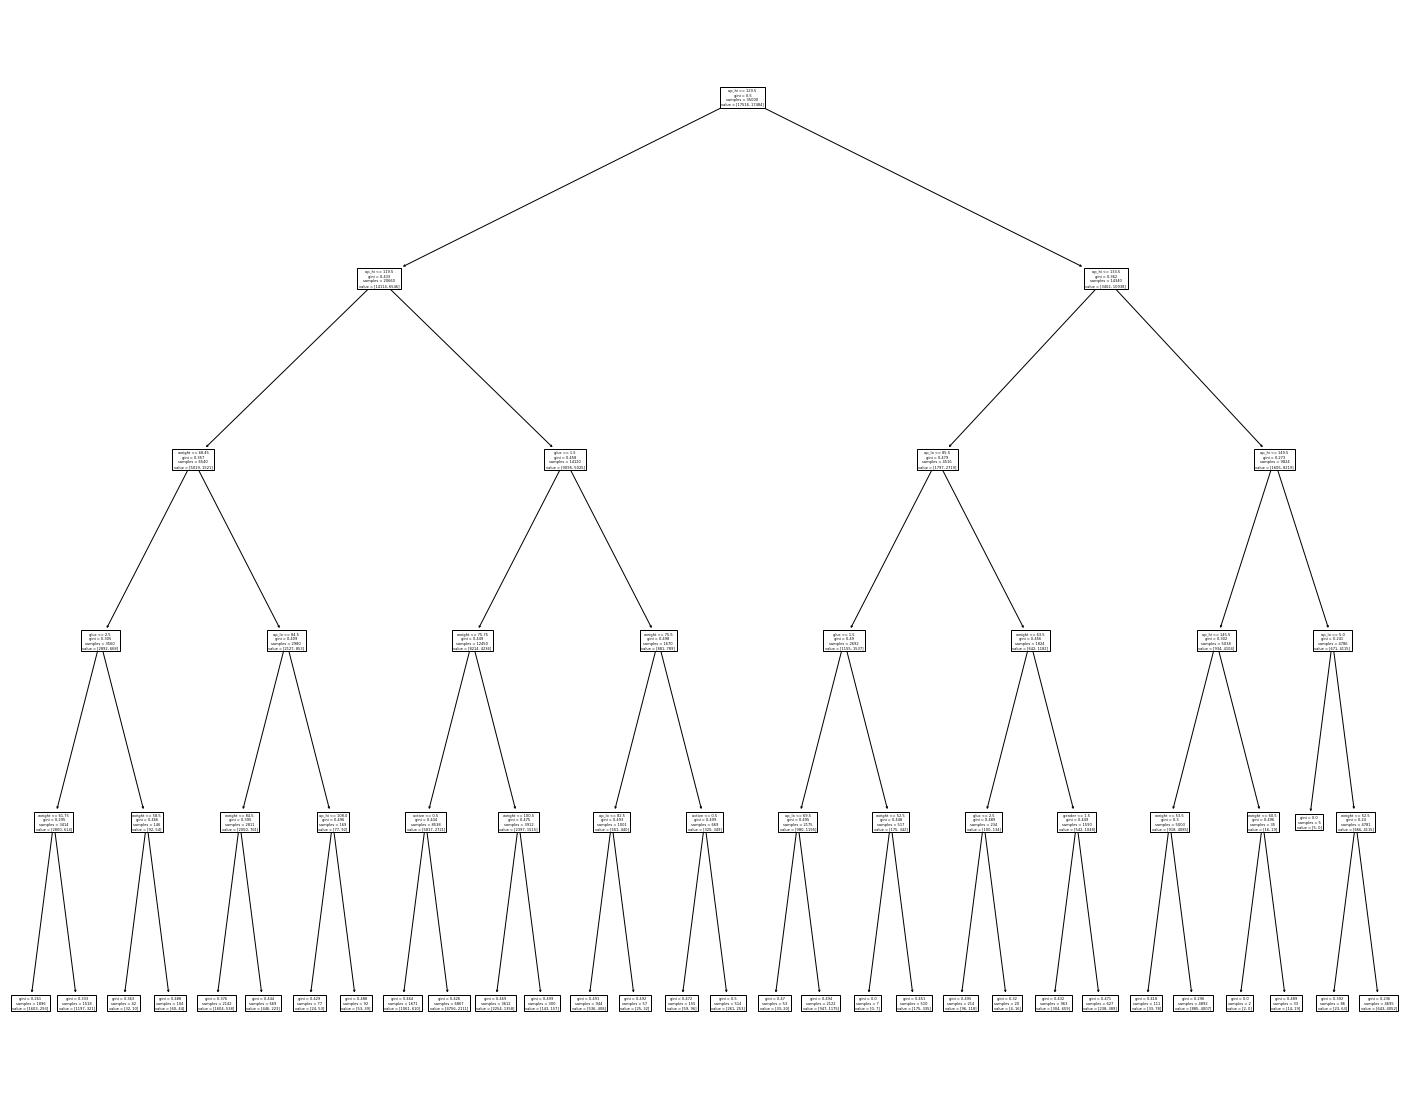

In [7]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25, 20))
tree.plot_tree(model,
               feature_names = X_bt.columns)
fig.show()

 # 4. Объединение предсказанных лейблов

4.1 Идентификация предсказанных лейблов

In [8]:
index_df = pd.DataFrame(index=X.index)
pred_df = pd.DataFrame(pred, index=X_bt.index, columns=['label_new'])
pred_df = pd.concat([index_df, pred_df], axis=1)
pred_df.head()
# NaN - строки не попали в выборки

,label_new
0,NaN
1,1.0
2,1.0
3,NaN
4,0.0


4.2 Форматирование предсказанных лейблов

In [9]:
pred_df['label_new'] = pred_df['label_new'].apply(lambda x: n if pd.isna(x) else [int(x)])
pred_df.head()
# множества из многозначной логики

,label_new
0,[]
1,[1]
2,[1]
3,[]
4,[0]


4.3 Соединение с имеющимися лейблами

In [10]:
df = pd.concat([df, pred_df], axis=1)
df.head()

,label_old,label_new
0,[],[]
1,[],[1]
2,[],[1]
3,[],[]
4,[],[0]


4.4 Агрегация лейблов

In [11]:
df['label_old'] = df[['label_old', 'label_new']].values.tolist()
df = df.drop(columns=['label_new'])
df.to_csv('labels.csv')
df.head()

,label_old
0,"[[], []]"
1,"[[], [1]]"
2,"[[], [1]]"
3,"[[], []]"
4,"[[], [0]]"


4.5.1 Четырехзначная конъюнкция

In [12]:
# def conj(labels):
#   a = labels[0]
#   b = labels[1]
#   if a == b:
#     return a
#   elif a == f or b == f:
#     return f
#   elif a == t:
#     return b
#   elif b == t:
#     return a
#   else:
#     return f

# df['label_old'] = df['label_old'].apply(conj)
# df.to_csv('labels.csv')
# df.head()

4.5.2 Четырехзначная дизъюнкция

In [13]:
def disj(labels):
  a = labels[0]
  b = labels[1]

  if a == b:
    return a
  elif a == t or b == t:
    return t
  elif a == f:
    return b
  elif b == f:
    return a
  else:
    return t

df['label_old'] = df['label_old'].apply(disj)
df.to_csv('labels.csv')
df.head()

,label_old
0,[]
1,[1]
2,[1]
3,[]
4,[]


4.6 Оценка точности Accuracy

In [14]:
iter = 0

pred = [x[0] if len(x) == 1 else -1 for x in df['label_old'].values]
print(f"Iter. #{iter} Accuracy: {round(accuracy_score(y, pred), 3)}")

Iter. #0 Accuracy: 0.161


4.7 Оценка точности Precision

In [15]:
from sklearn.metrics import precision_score

pred = [x if x == 1 else 0 for x in pred]
print(f"Iter. #{iter} Precision: {round(precision_score(y, pred), 3)}")

Iter. #0 Precision: 0.757


4.8 Оценка F1 Score

In [16]:
pred = [x if x == 1 else 0 for x in pred]
print(f"Iter. #{iter} F1 Score: {round(f1_score(y, pred), 3)}")

Iter. #0 F1 Score: 0.452


#5. Повторение пунктов 3-4

In [28]:
iter += 1

X_bt = X.sample(frac=max_features)
X_bt = X_bt.sample(frac=max_features, axis='columns')
y_bt = y.loc[X_bt.index]
print(X_bt.shape)


from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_bt, y_bt)
pred = model.predict(X_bt)
print(accuracy_score(y_bt, pred))

from sklearn import tree
from matplotlib import pyplot as plt

# fig = plt.figure(figsize=(25,20))
# tree.plot_tree(model,
#                feature_names = X_bt.columns)
# fig.show()

index_df = pd.DataFrame(index=X.index)
pred_df = pd.DataFrame(pred, index=X_bt.index, columns=['label_new'])
pred_df = pd.concat([index_df, pred_df], axis=1)
print(pred_df.head())
# NaN - строки не попали в выборки

pred_df['label_new'] = pred_df['label_new'].apply(lambda x: n if pd.isna(x) else [int(x)])
print(pred_df.head())
# множества из многозначной логики

df = pd.concat([df, pred_df], axis=1)
print(df.head())

df['label_old'] = df[['label_old', 'label_new']].values.tolist()
df = df.drop(columns=['label_new'])
df.to_csv('labels.csv')
print(df.head())

df['label_old'] = df['label_old'].apply(disj)
df.to_csv('labels.csv')
print(df.head())

pred = [x[0] if len(x) == 1 else -1 for x in df['label_old'].values]
print(f"Iter. #{iter} Accuracy: {round(accuracy_score(y, pred), 3)}")

pred = [x if x == 1 else 0 for x in pred]
print(f"Iter. #{iter} Precision: {round(precision_score(y, pred), 3)}")

print(f"Iter. #{iter} F1 Score: {round(f1_score(y, pred), 3)}")

(35000, 6)
1.0
   label_new
0        NaN
1        1.0
2        1.0
3        NaN
4        0.0
  label_new
0        []
1       [1]
2       [1]
3        []
4       [0]
  label_old label_new
0       [1]        []
1       [1]       [1]
2       [1]       [1]
3       [1]        []
4        []       [0]
    label_old
0   [[1], []]
1  [[1], [1]]
2  [[1], [1]]
3   [[1], []]
4   [[], [0]]
  label_old
0       [1]
1       [1]
2       [1]
3       [1]
4        []
Iter. #12 Accuracy: 0.499
Iter. #12 Precision: 0.796
Iter. #12 F1 Score: 0.885
